# Accounting for User Subjectivity - An Approach to Modelling Subjectively determined Exogenous System Variables

Qwerte

> We provide descriptions and interactive plots to provide an intuition for the inner workings of our beta-distribution based instrument for modelling manifested demand.

#### ToC
1. Context, Strategy and Remarks
2. Beta Intuition
3. Hard-Coded Example
4. Mathematical Remarks on Beta
___
## 1. Context, Strategy and Remarks
___
The Endaoed exploration of the question posed by the Liquity team has landed on a strategy that lands adjacent to what was asked for. The approach does not attempt not to model price directly, but instead we have chosen to develop a model that describes how the informed demand of a user actualises to a decision. Two concern have deterred exploration into routes towards price estimation with economic-behavioural tools: Classic Walrassian assumptions such as rationality, weak rationality, perfect information, market liquidity, concave utility, etc, are not only fanciful, they are especially unreasonable in the context of protocols likely to employ the CB mechanism. More critically however, such insistent algebraic and calculus schlonging intended to bully out some suggestion of a price from the system variables can be quite unbearable on the eyes and, all too often in the experience of the author, the soul. Thus from our nicotine fuelled musings, an alternative was arrived at which employs the spirit of the beta distribution! It is the conviction of the Endaoed team that this soul-affirming, pragmatic and dignified cooperation with the system variables contains the kernel of a profitable insight.

___
### The Beta Composition Strategy
___
Describing the strategy in the broadest strokes allows the reader to speculate as to how it may be generally applied in similar subjectivity-simulating situations. 
Thus, details for the exogenous variables of the CB mechanism will be discussed in detail later. The general strategy is as follows:

##### Strategy Outline
At any timestep, to determine how an agent presented with a decision to make might exercise a choice, define the decision such that it is to be "followed through" with some probability:

1. Identify all system variables for which a subjective interpretation is required of the agent in order to make a decision.
2. To each system variable, define a score that identifies a "low" to "high" range of possible variable values. This may require some conversion by metric-y means.
3. Define an interpretative map such that a "low" value of the variable maps to a "low" probability that the agent will exercise the choice, "high" for high.
4. Parameterise each variable's "low" to "high" range such that it maps to the interval $[1.5, 10.5]$, which will be the alpha parameter of a beta distribution. The beta parameter is determined by some relation to alpha. The attitude with which this map is to be determined is that of choosing a continuous series of Bayesian priors.
5. Once the general continuum of priors is defined for each system variable, yield actual beta distribution parameters based on the system variable quantities at the timestep
6. Exploit the beta distribution's composability property to arrive at composite beta distribution parameters. \*(Further notes on Beta dist at the bottom)
7. Use this prior to collect samples or use the betabinomial with the composite parameters to attain a decision.

The final beta distribution attained can be thought of as a composite bayesian prior. The simple composability of the beta distribution allows us to easily acquire a model for the agent's likeliness to exercise the choice. It takes into account any subjective consideration that may influence an agent's decision, parameterised in any way we choose, composes them seamlessly all while remaining completely modular. One further flourish can be inserted between the original range and the final outputted beta parameters to bring even more realistic dynamics to the system, which is the use of a parameter modifier. The use of a modifier function allows the "rate of change of betas" speaking loosely, to match our expectations. 

In a single line, we could describe the beta strategy as: At every timestep, for every agent presented with a decision to be made, model the likelihood of "following thorugh" on the decision as a composite "bayesian prior" for an arbitrary number of independent pieces of information as a function of the unique propensities of the agent.

##### Example
To give a relevant, dummy example: consider a bond holder who is deciding whether or not they should redeem a bond. One imagines that the likeliness of redeeming, is a piecemeal function of time: from the moment of bonding until break-even, we would expect the probability of chickening in to be sticky around zero, though it may increase very slowly. After that point, the likeliness of redemption shoots upwards as the bond's age approaches "optimal" (whatever the user considers optimal given their particular strategy). Once the age of the bond breaks optimal redemption time, we expect the probability to never go to 100%, but to be sticky around 100% for every timestep thereafter. Modelling these attitudes with parametric functions, the lowest level parameter $age$ moves from  $[0, 1]$ linearly, but the parameter which determines where the bulk of the beta distribution lies is determined by, say,  $age^n$ which, while not piecemeal, captures the sentiment well enough for the purpose of this example. Thus, as $age$ moves across the unit interval, the beta distribution's mass moves with polynomial acceleration across the domain. (An interactive plot is provided below for an intuitive feel)


##### Modifier
This parameter modifier is also totally modular. Any modifier can be plugged in the place of $p^n$ to make the beta change however we wish. To hint at another example, we could hypothesise that the likeliness of redeeming bTKNs may have some connection with the daily return of the underlying TKN. If the TKN price suddenly jumped upwards and I had a position in bTKN, I could imagine I'd be tempted to redeem and dump slowly. In this case, we could use an exponential, linear relation, sinusoidal, whatever. 


##### Final structure of parametrics

First, an initial range is defined which captures the lower and upper values, define such that the lower and upper bounds map to the lowest and greatest likeliness betas. The range is remapped with the modifier and parameterised to the unit interval $[0, 1]$, then the unit is mapped to the alpha range $[1.5, 10.5]$ from which the beta parameter is derived. The mapping to the unit interval appears analytically unnecessary, but it has some benefits in implementation of the actual code, for example, when using a logarithmic modifier. Let us clarify precisely what this stack of maps look like:

1. Variable range is defined $[V_{min}, V_{max}]$ and modifier $m: \mathbb{R} \mapsto \mathbb{R}^+$ is chosen.

$$
\begin{align}
f_1 &: \mathbb{R} \mapsto [0, 1]\\
f_1(x) &= 
\begin{cases}
0 & x < V_{min}\\
\frac{m(x) - min(m(x))}{max(m(x)) - min(m(x))} & x \in [V_{min}, V_{max}]\\
1 & x > V_{max}
\end{cases}
\end{align}
$$

The variable range does not suggest bounds for possible system values, but they bound the agent's probability assigning values: "For values $V_{max}$ and above, I absolutely want to redeem"

2. The unit is mapped to $[1.5, 10.5]$ to give alpha and beta:

$$
\begin{align}
f_2(x) &= 9x + 1.5\\\\
\alpha &= f_2(x), \>\> \beta = 12 - f_2(x)
\end{align}
$$

##### Implementation
A natural way to implement this is to place the parametric's parameters that determine agent beta distribution parameters as properties of the agent. This is sensible on the interpretation front as it is the agent's propensities that are being beta-dist'ed. And a corollary of this setup is that we can design subpopulations of users by engineering "typical" parameter profiles. Thus, we can consider users who are "rational", "mercenary", "risk averse", "what is a stop-loss?", etc. This is where behavioural speculation can take the limelight on the stage provided by our plug-and-play instrument.

A possible approach is to consider, for each variable, an upper and lower bound, a weighting of importance for the variable and the agent's sensitivity to change in the vairable, which is velocity. Thus, to each agent, add the property "propensities" which contains a dictionary of the above mentioned:

```
agent = {
    propensities : {
        var1 : {
            lower : float,
            upper: float,
            weight : float,
            vel : int
        },
        var2 : {
            ...
        },
        ...
        varN : {
            ...
        }
    },
    other agent properties: {
        ...
    }
}
```

The simulation can read the properties of each agent, crunch out the beta parameters then yield a decision from, probably an `np.betabinomial` for that individual agent.

##### Final Remark - Relevance to the original question
Tying this strategy into an actual price estimate would probably depend on what the method of price estimation. Our efforts were entirely focused on the relevance of the instrument to our cadCad model in the primary interest of simulating. Honestly, we can't see how a useful price modelling is possible if the system model imposes hard assumptions everywhere. From the author's limited readings into modelling economic systems or variables, any such impositions that flatten the system's complexity in any way will yield results that usually don't have an easy interpretation with respect to an assumption-unrestricted run. Even if it does appear to have an easy interpretation, it is all too easy to get causality backwards, to find a correlation without causation, fail to spot an assumption of path independence, etc. Having said all this, price estimation is not something in our experiential repertoire, so perhaps the hint of pessimism in this remark is really an undue corollary of our limitations in this domain. In recognising this, we are eager to see if and how this instrument could be of value to the Liquity team, and thus we would endorse the profitable appropriation of this small instrument or its components into any other context.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from explain_beta_helper import *

## 2. Beta Intuition 
By toying with the parameters, one can arrive acquire a feel for how it moves:

In [2]:
standard_beta()

interactive(children=(FloatSlider(value=6.0, description='a', max=40.0, step=0.001), FloatSlider(value=6.0, de…

FigureWidget({
    'data': [{'type': 'scatter',
              'uid': '07040db4-fd43-4846-b953-f956968a2312',
 …

After some time, it might be observed that alpha and beta moving in contrary motion slides the mass of the beta distribution across the unit interval. The gliding motion of the distribution created by the contra-motion of the parameters suggests a way in which the beta's parameters might suggest a mapping of unlikeliness to likeliness where rising alpha values generally correspond to rising likeliness and rising beta values generally corresponds to lowering. This is the motivation for having a constraint at all. The choice of 12 as the upper bound is perhaps unnecessary, but it feels safe having not the time to analyse to much depth. Some experimentation at the boundaries of $\alpha + \beta = 12$ may reveal why. In any case, the interactive plot below is identical to the previous, but only the control for the alpha parameter is exposed. The beta value is determined automatically by $\beta = 12-\alpha$. Observe how the mass of the distribution slides across the domain. 

In [3]:
constrained_beta()

interactive(children=(FloatSlider(value=6.0, description='a', max=10.5, min=1.5, step=0.001), Output()), _dom_…

FigureWidget({
    'data': [{'type': 'scatter',
              'uid': 'd06a46f6-5ef8-46d0-99f3-43007fb7c66a',
 …

The next layer of manipulation determines the sensitivity of the beta to the underlying parameter. This is the effect of the modifier functions mentioned earlier. Sliding the alpha parameter with constant speed in the previous interactive will slide the distribution across the unit interval with constant speed. This is not the case for the interactive below. The distribution below is relatively insensitive to change of alpha on the lower portion of the interval, but is very sensitive to the upper. This rate of change modification is achieved by re-parameterising the alpha and beta values so that they still add to the constant $12$ but also move with an acceleration. For the interactive plot below, the parameters are defined: 
$$
\begin{align}\alpha = 9p^{8}+1.5\\ \beta = 10.5 - 9 p^{8}
\end{align}
$$
where $p \in [0, 1]$ is the linearly changing parameter

The choice of 8 as the exponent was for exaggerated visual effect and is otherwise arbitrary. The choice of polynomial function is also arbitrary. It could be replaced by an exponential or any other choice of function.

In [4]:
constrained_beta_with_nonlinear_param()

interactive(children=(FloatSlider(value=0.0, description='p', max=1.0, step=0.001), Output()), _dom_classes=('…

FigureWidget({
    'data': [{'type': 'scatter',
              'uid': 'd84886d2-d2f7-4afd-8a0d-3c828c915d02',
 …

The final piece of intuition that may be valuable is to understand is how exactly the composition occurs, and why we choose to add parameters as compared to adding the functions as a superimposition and normalising. After all, the priors could have been superimposed, as is suggested by Richard Royall in his Statistical Evidence: A Likelihood Paradigm. This method makes the most sense if we had multiple pieces of evidence for the same underlying phenomenon, but this is not the case for our mechanism. Instead, we require of the agent considerations for multiple differing underlying forces, each which will have associated priors not necessarily related to another. Still, they are all subjectively influential, and thus the information must be composed in another way. Multiplied, the distributions combine like priors and likelihoods, though this comparison is not perfect for reasons outlined in the bottom maths section. On the other hand, it's not completely unlike priors and likelihoods: suppose two subjective considerations independently suggest to the agent a 10% chance ($B(2, 20)$) of exercising a decision. Then to consider both, they sharpen the agent's confidence on that 10% value - visually, we would expect two betas that clump around 0.1 to compose into a narrower beta that clumps around 10%. Since neither of the two considerations contain evidence in the form of actual data, theoretically the pair shouldn't move the probability. Thus, there is some realism to the multiplicative approach, for which the final parameters are a function of the sum of the parameters for the individual considerations.

In [5]:
additive_beta_composition()

interactive(children=(FloatSlider(value=1.5, description='a', max=10.5, min=1.5, step=0.001), Output()), _dom_…

FigureWidget({
    'data': [{'line': {'color': 'blue', 'width': 4},
              'name': 'summed beta',
     …

1. summed beta (blue) is the superimposition (added) beta that is the output beta
2. fixed beta (dashed black) is the base beta which is fixed for the sake of example
3. added beta (orange) is the beta which is added onto the base

Note the above is adding the betas directly without normalisation. The summed beta does not behave in a way that matches sensible assumptions about agents:
1. When the added beta (orange, affected by slider) is on the right, we get a two-hump prior
2. When the added beta is on the left, the superimposition achieves get no sharpening of confidence (a tightened distribution). Instead, the summed beta is roughly as wide as the fixed beta.

In [6]:
multiplicative_beta_composition()

interactive(children=(FloatSlider(value=1.5, description='red', max=10.0, min=1.5, step=0.001), Output()), _do…

FigureWidget({
    'data': [{'line': {'color': 'blue', 'width': 3},
              'name': 'composite Beta',
  …

Let's remove the constraint and allow three sliding betas to produce our composite blue beta:

In [7]:
multiplicative_beta_composition2()

interactive(children=(FloatSlider(value=1.5, description='red', max=10.0, min=1.5, step=0.001), FloatSlider(va…

FigureWidget({
    'data': [{'line': {'color': 'blue', 'width': 3},
              'name': 'composite Beta',
  …

1. composite beta (blue) is the composed (multiplied) beta that is the output beta
2. fixed beta (dashed black) is the base beta which is fixed for the sake of example
3. imposed beta (orange) is the beta which is multiplied to the base

Experimentation with the parameter and inspection will be most informative, but I wish to point out, regarding the blue composite beta: 
- Sharpens as the fixed and imposed betas overlap (black and orange combine in a way that "sharpens" confidence)
- is a Single hump prior that "averages" the two in a way that feels like a reasonable approximation of realistic, subjective composition of information

This gives us all the necessary parametric tools and intuitions to start thinking about the strategy.


## 3. Hard Coded Example

Details of the general strategy are not rigorously defined, both in this notebook, and the actual formulation the author has in mind. Therefore, it is easiest (and most realistic given time constraints) to relay understanding by producing an example. Let's suppose that an agent is holding a bond and considers at every timestep from initialisation until redemption whether or not the bond should be redeemed. For simplicity without loss of insight/generality, let us assume that there are four considerations the agent mulls over before making a decision. Let's use the outline of the strategy and fill in the technical details step by step:


##### 1. Identify all system variables for which a subjective interpretation is required of the agent in order to make a decision.
1. Age of the bond owned by the agent
2. Volume of TKN traded on Uniswap the day before
3. Number of bonds chickened-in the day before
4. Number of yellow cars spotted on commutes the day before

##### 2. To each system variable, define a score that identifies a "low" to "high" range of possible variable values. This may require some conversion by metric-y means.
1. $[1, 35]$ (optimal redemption time is 35 and no redemption in the same day as creation)
2. $[5 \times 10^3, 5\times 10^6]$
3. $[0, 5]$
4. $[1, 10]$ (the agent's car is yellow)

These don't exhaust the possible range of values that could be observed. They are only the values at which the agent's probabilities hit boundaries (which yield distributions from which a decision is sampled - not spot probabilities).

##### 3. Define an interpretative map such that a "low" value of the variable maps to a "low" probability that the agent will exercise the choice, "high" for high.
1. low values -> low probability with polynomial velocity
    - $\alpha \propto p^d$ for parameter $p \in [0,1]$ and degree $d$
2. low values -> low probability with root velocity
    - $\alpha \propto ln(p)$ for parameter $p \in [0,1]$
3. low values -> low probability with linear velocity
    - $\alpha \propto p$ for parameter $p \in [0,1]$
4. Uniform
    - $\alpha = 1, \beta = 1$ (special case out of bounds)

##### 4. Parameterise each variable's "low" to "high" range such that it maps to the interval $[1.5, 10.5]$, which will be the alpha parameter of a beta distribution. The beta parameter is determined by some relation to alpha. The attitude with which this map is to be determined is that of choosing a continuous series of Bayesian priors.

For all considerations:
$$
\begin{align}\text{alpha range} &= \frac{(I_{nterval} - I_{min}) (10.5 - 1.5)}{I_{max} - I_{min}}\\
\alpha &\in [1.5, 10.5]\text{ ,  } \beta= 12-\alpha\\
\end{align}
$$
##### 5. Once the general continuum of priors is defined for each system variable, yield actual beta distribution parameters based on the system variable quantities at the timestep.
For the sake of ceteris paribus, let's fix the agent's propensities and consider two different status quos at a timestep $t$.

The agent's propensities are defined:
- bond_age 
    - velocity : 3
    - modifier : polynomial
    - weight : 1
- traded volume
    - velocity : 3
    - modifier : logarithmic
    - weight : 1
- n chicken-ins
    - velocity : 1
    - modifier : linear
    - weight : 1
- n yellow cars
    - velocity : na
    - modifier: uniform
    - weight : 1

Version 1 status quo

- bond_age = 12
- traded vol = $3.2\times 10^3$
- n chicken-ins = 1
- n yellow cars = 3

Version 2 status quo

- bond_age = 40
- traded vol = $1.78\times 10^{4}$
- n chicken-ins = 4
- n yellow cars = $2\times 10^{153} \>\>\>\> \tiny\text{(busy day)}$


Modifiers

- Polynomial $m_p(x, d) = x^{d}$
- Logarithmic $m_l(x) = ln(x)$ No meaningful use of degree here since it will be affine'd away
- Linear $m_a(x, d) = d \cdot x$
- Uniform $m_u(x, d) = \text{"uniform"}$

##### 6. Exploit the beta distribution's composability property to arrive at composite beta distribution parameters. 
V1:
- age param: 0.04
- vol param: 0.27
- car param: NA
    - $\alpha$ = 6.82
    - $\beta$ = 19.18

V2:
- age param: 1
- vol param: 0.68
- car param: NA
    - $\alpha$ = 19.08
    - $\beta$ = 6.92

##### 7. Use this prior to collect samples or use the betabinomial with the composite parameters to attain a decision.

You do it man. I'm done.


VERSION 0
 	Individual params:
	 bond_age 	 a: 1.86, b: 10.14
	 traded volume 	 a: 1.50, b: 10.50
	 chicken ins 	 a: 3.30, b: 8.70
	 yellow cars 	 a: 1.00, b: 1.00

Composed params: 	 a: 7.66 b: 30.34


VERSION 1
 	Individual params:
	 bond_age 	 a: 10.50, b: 1.50
	 traded volume 	 a: 7.58, b: 4.42
	 chicken ins 	 a: 8.70, b: 3.30
	 yellow cars 	 a: 1.00, b: 1.00

Composed params: 	 a: 27.78 b: 10.22



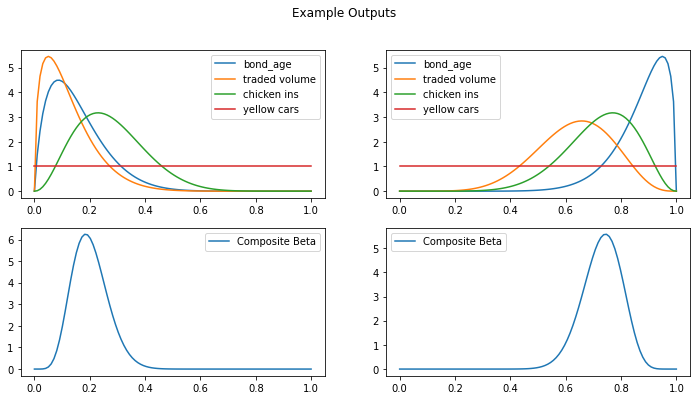

In [8]:
# --- AGENT'S PROPENSITIES - keep in mind, these are properties of the agent
age_r, age_v, age_m = np.array([0, 35]), 3, "polynomial"
vol_r, vol_v, vol_m = np.array([1e3, 5e6]), 1, "logarithmic"
ins_r, ins_v, ins_m = np.array([0, 5]), 1, "linear"
car_r, car_v, car_m = np.array([1, 10]), 1, "uniform"

# --- STATUS QUO SCENARIOS
age_v1, vol_v1, ins_v1, car_v1 = 12, 3.2e2, 1, 3
age_v2, vol_v2, ins_v2, car_v2 = 40, 1.78e4, 4, 2e153

# --- Summarised propensities
propensities = {
    "bond_age" : {"range" : age_r, "velocity" : age_v, "modifier" : age_m},
    "traded volume" : {"range" : vol_r, "velocity" : vol_v, "modifier" : vol_m},
    "chicken ins" : {"range" : ins_r, "velocity" : ins_v, "modifier" : ins_m},
    "yellow cars" : {"range" : car_r, "velocity" : car_v, "modifier" : car_m}
}
# --- Summarised versions
versions = [
    {
        "bond_age" : age_v1,
        "traded volume" : vol_v1,
        "chicken ins" : ins_v1,
        "yellow cars" : car_v1,
    },
    {
        "bond_age" : age_v2,
        "traded volume" : vol_v2,
        "chicken ins" : ins_v2,
        "yellow cars" : car_v2,
    }
]

# --- Extract alphas and plot
output_params = [composer(propensities, v) for v in versions]
plot_output(output_params)
output_version_results(output_params)

## 4. Mathematical Remarks on Beta

The PDF for the beta distribution on $ x\in [0, 1]$ with parameters $\alpha, \beta \in \mathbb{R}$ :

$$
f(x, \alpha, \beta) = \frac{1}{B(\alpha, \beta)} x^{\alpha-1}(1-x)^{\beta-1}
$$

where the $B$ function is a bunch of gamma stuff, which serves as a normalising constant on the $x$ part of the function (the kernel)

The kernel of the beta pdf reveals why the beta functions are so compliant to composition. If we have two beta distributions, $Beta_1(\alpha_1, \beta_1)$ and  $Beta_2(\alpha_2, \beta_2)$ then, ignoring the normaliser, we have:

$$
\begin{align}
&Beta_1(\alpha_1, \beta_1) \cdot Beta_2(\alpha_2, \beta_2)\\
\implies &x^{\alpha_1 - 1}(1-x)^{\beta_1 - 1} \cdot x^{\alpha_2 - 1}(1-x)^{\beta_2 - 1}\\
\implies &x^{\alpha_1 + \alpha_2 - 2}(1-x)^{\beta_1 + \beta_2 - 2}\\
\implies &Beta_1(\alpha_1 + \alpha_2 - 1, \beta_1 + \beta_2 - 1)\\
\end{align}
$$

For $n$ system variables, that's n beta distributions composed into final beta dist $\mathcal{Beta}$:

$$
\begin{align}
&\mathcal{Beta}(A-n, B-n)
\end{align}
$$
where $A = \sum_{i=1}^{n} \alpha_i$ and $B = \sum_{i=1}^{n} \beta_i$ are the sums of system parameters

##### Analogy to Bayesian stuff
Since we aren't combining a prior with a likelihood, it doesn't add up to a posterior exactly. I'm not sure how to interpret the fact that the final parameters are one reduced per layer of variable, the hand-wavy interpretation in my head that makes the most sense is that it has something to do with degrees of freedom, but this is pushing my statistical understanding, so I won't go any deeper on this. This also needs to be reconciled with the bounds placed on the beta distritbution parameters, as the constraint was not designed with this maths in mind.

##### Beta Composition Rules

Additive superimposition versus multiplicative composition has been roughly explained, but there are still quirks of the compositional approach that strike me as problematic. For example, the confidence-sharpening phenomena that occurs with composition of overlapping betas is sensible and happens with the additive parameter combining, but confidence reducing might need to be considered since adding betas almost always seems to sharpen confidnece, though i'm speculating without having done a thorough analysis. I have a hunch that limiting composition to only addition of parameters might skew things to the middle more than we would want, in which case, maybe some sort of beta factorising might be useful? Hard to say without a more rigorous analysis which would be on the to-do list but for time. Another issue that feels pretty important is that there are surely subjective factors which may overwhelm other consideations entirely. For example, once a bond hits optimal redemption time, it feels like a more sensible assumption that most agents would ignore almost all other variables most of the time. Perhaps if the weighting propensity of the agents were in $[0, 1]$ and add to 1, then we could have some kind of "trade-off of considerations" notion? It gets complicated, so I'm leaving these considerations as an exercise to the reader because I need a holiday.